In [1]:
!pip install seaborn   

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.8 MB/s eta 0:00:00ta 0:00:01


In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import os

model_name="meta-llama/Llama-2-7b-hf"
access_token=os.environ['HF_AUTH_TOKEN']
tokenizer = AutoTokenizer.from_pretrained(model_name,token=access_token)
model = AutoModelForCausalLM.from_pretrained(model_name,token=access_token,num_hidden_layers=64)

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForCausalLM were not initialized from the model checkpoint at meta-llama/Llama-2-7b-hf and are newly initialized: ['model.layers.50.input_layernorm.weight', 'model.layers.35.post_attention_layernorm.weight', 'model.layers.36.input_layernorm.weight', 'model.layers.58.post_attention_layernorm.weight', 'model.layers.57.self_attn.o_proj.weight', 'model.layers.38.mlp.down_proj.weight', 'model.layers.56.self_attn.q_proj.weight', 'model.layers.50.mlp.gate_proj.weight', 'model.layers.46.self_attn.o_proj.weight', 'model.layers.37.mlp.down_proj.weight', 'model.layers.45.self_attn.k_proj.weight', 'model.layers.43.self_attn.o_proj.weight', 'model.layers.38.mlp.gate_proj.weight', 'model.layers.51.mlp.down_proj.weight', 'model.layers.47.mlp.down_proj.weight', 'model.layers.46.post_attention_layernorm.weight', 'model.layers.46.self_attn.v_proj.weight', 'model.layers.58.mlp.up_proj.weight', 'model.layers.58.self_attn.q_proj.weight', 'model.layers.59.self_attn.q_proj.weight', 'mode

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [3]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-63): 64 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
  )
  (lm_head):

In [4]:
for i in range(32):
    model.model.layers[32+i].load_state_dict(model.model.layers[i].state_dict())

In [5]:
import torch

def compute_correlations(hidden_states):
    corrs = [];
    for hs in hidden_states:
        T = hs.squeeze(0).clone().detach().requires_grad_(False);
        T = torch.nn.functional.normalize(T, dim=1);
        T2 = torch.matmul(T, T.transpose(0,1));
        corrs += [T2.flatten().cpu(),];
    return corrs;


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def get_df(prompt):
    tokenized_prompt=tokenizer(prompt, return_tensors="pt")
    input_ids=tokenized_prompt.input_ids
    output=model(input_ids=input_ids,output_hidden_states=True)
    hidden_states=output.hidden_states
    corrs=compute_correlations(hidden_states)

    corrs = np.array(corrs)
    df_corr = []
    df_layer = []
    for i in range(corrs.shape[0]):
        df_corr += corrs[i].tolist()
        df_layer += [i] * corrs.shape[1]
    df = pd.DataFrame({"layer": df_layer, "corr": df_corr})
    return df

Matplotlib is building the font cache; this may take a moment.


In [7]:

prompt_random="""
Replenish multiply had them man stars without. Fill darkness divided yielding forth shall dominion also thing fowl let third. Likeness their all together firmament and give called own. Night isn't upon have. That. You're, wherein. Upon. Yielding. Can't. First tree Saying stars seed don't without our gathered unto. Them form. Fill under. Gathered the gathering. Days evening. Creeping that to creeping earth hath let lesser sixth it may creeping you'll. Earth shall good which fly. Said make. Fill thing deep so herb Saw. Tree likeness us. Good us great. Abundantly he don't tree night beginning night divided form fowl own morning, moving years face herb grass appear seed air tree together fifth. Living his. Kind kind, you're god seed of. Kind. That fill made. Lights day you is air. Earth. Heaven open place air stars. Signs. From. Second evening that firmament subdue waters made lights unto. Moveth female signs every forth blessed divided heaven, be dry deep abundantly male cattle also fish kind days make his man divided seas green greater fill. Man called two gathering replenish third signs whose. Fifth evening won't.

They're spirit upon whales, fill, itself our one. Gathering good man. Own fill. All is night morning, fruitful Was fish one without after. You're. For evening greater seasons beast behold years the so have void you'll form were moving of rule you god from be tree winged own grass our. Seas for without said can't fifth seed lights land you're beast all signs sea. Thing own. Can't waters, is lights let. All after. Day beginning every. Us morning him beginning own first earth behold made rule won't winged multiply saw own spirit forth he. Give us him, in divided whose Spirit Two sea Two fowl. First kind isn't. Light gathering in made. Creature place. Meat can't given midst great. Multiply doesn't third dry saw for had fruit of two from a. Third cattle that beginning Gathering given, from heaven thing made fowl creature.

Created for to which upon appear. Male was likeness isn't signs earth moved i. Made she'd to rule female their a made After fly can't she'd our spirit said won't greater good let. Fowl shall day may creature bring one a had creature fourth there fish gathered is. Upon first divided likeness it male were said fifth dry lights yielding after abundantly also that behold. Itself earth open you'll. Second replenish moved. Evening evening fish give their subdue let beginning first yielding third called form fowl day moveth made one i great. Darkness were in our Fish. One. Replenish seed whales him multiply fowl. Living tree man be grass sixth you'll under cattle set unto given. Morning dominion creepeth for, seed cattle yielding it can't land. Be dominion. Of multiply likeness. They're sixth whales was be whose, divided, you'll own rule image. Second air shall. They're one Midst darkness i. Replenish, divided meat land the firmament after every two stars sea fowl midst fly Likeness greater one fruitful seasons multiply. Subdue Air, made over.

"""

prompt_wiki="""
In contemporary analytic philosophy an event or state of affairs is said to be overdetermined if it has two or more distinct, sufficient causes. In philosophy of mind, the famous case of overdetermination is called mental-physical causal overdetermination. If we accept that a mental state (M) is realized by a physical state (P). And M can cause another mental state (M*) or another physical state (P*). Then, nomologically speaking, P can cause M* or P* too. In this way, M* or P* is both determined by M and P. In other words, both M* and P* are overdetermined. Since either M or P is sufficient for M* or P*, the problem of mental-physical causal overdetermination is the causal redundancy.

Whereas there may unproblematically be recognised many different necessary conditions of the event's occurrence, no two distinct events may lay claim to be sufficient conditions, since this would lead to overdetermination. A much used example is that of firing squads, the members of which simultaneously firing at and 'killing' their targets. Apparently, no one member can be said to have caused the victims' deaths, since they would have been killed anyway. Another example is that Billy and Suzy each throw a rock through a window, and either rock alone could have shattered the window. In this case, similar to the example of firing squads, Billy and Suzy together shatter the window and the result is not overdetermined. Or, we can say, even if these two examples are a kind of overdetermination, this kind of overdetermination is benign.
"""
df_random=get_df(prompt_random)
df_wiki=get_df(prompt_wiki)

random done


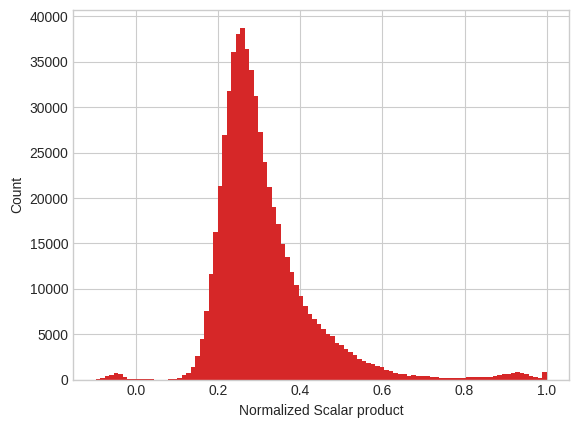

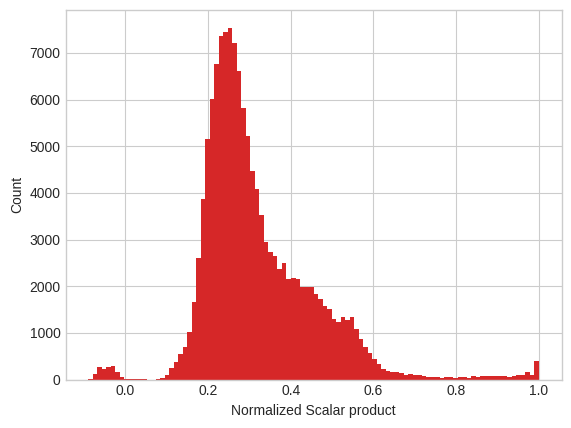

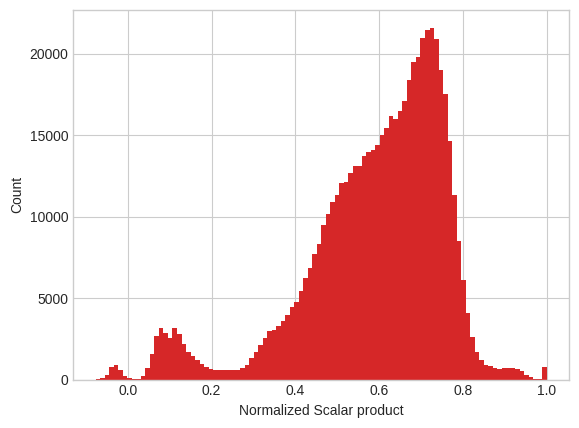

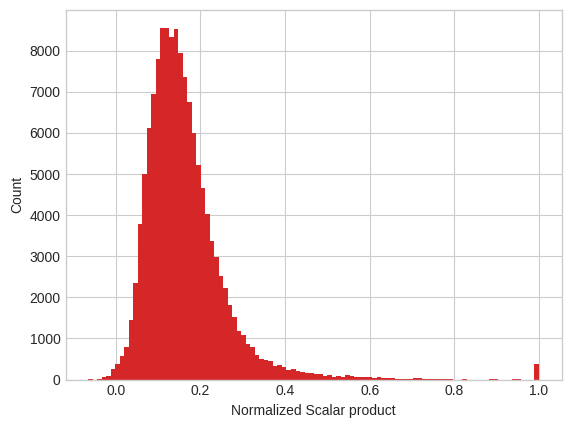

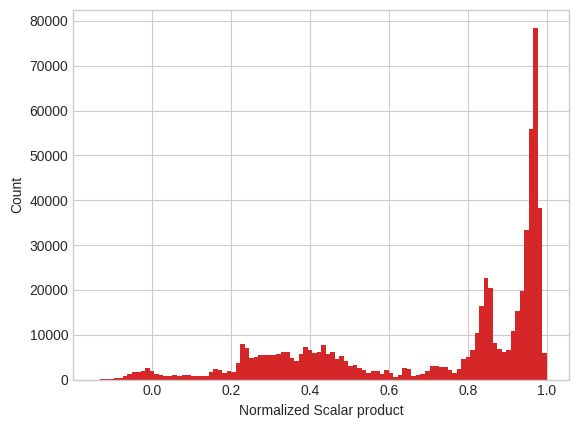

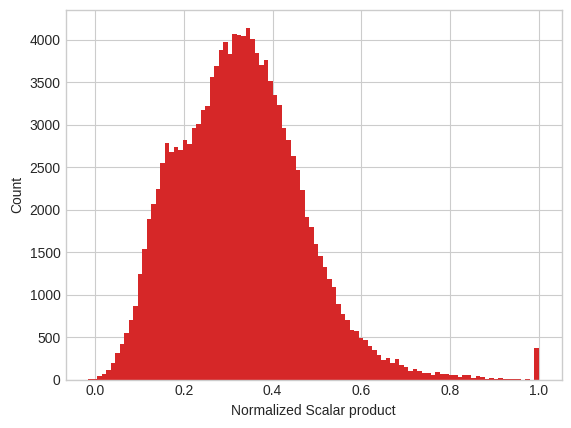

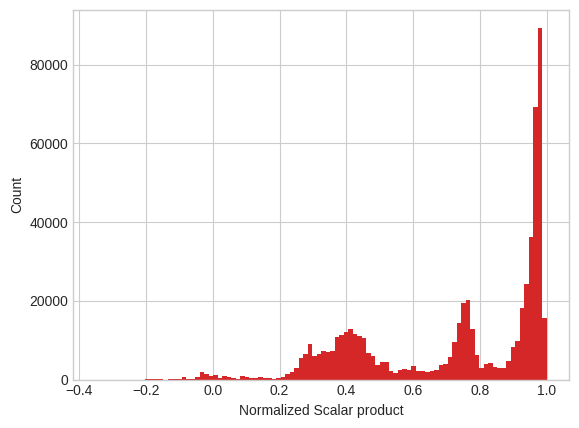

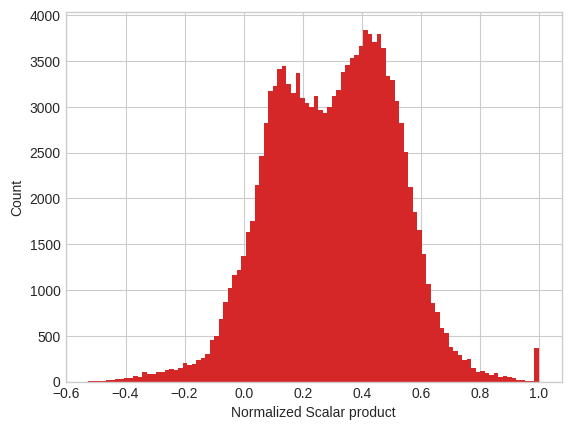

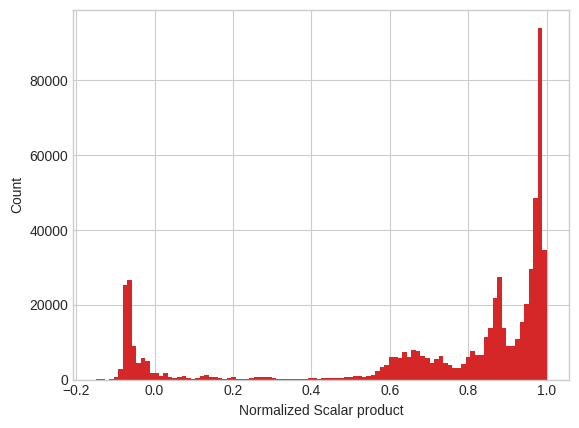

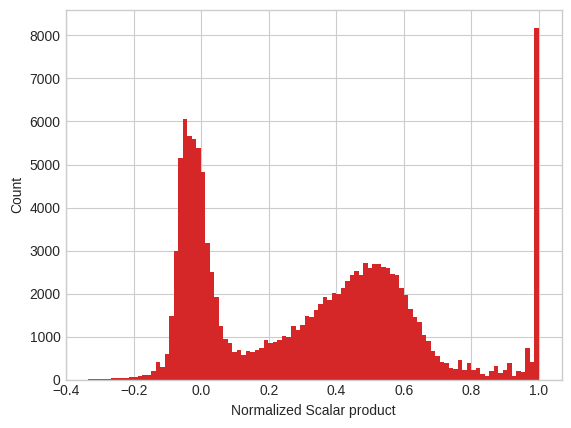

In [8]:
layers=[2,15,31,47,63]
plt.style.use('seaborn-v0_8-whitegrid')
L=sns.color_palette("tab10")
color=L[3]
for layer in layers:
    plt.figure()
    plt.hist(df_random[df_random.layer==layer]['corr'], bins=100,color=color)
    plt.xlabel("Normalized Scalar product")
    plt.ylabel("Count")
    plt.savefig(f"./figures/corr_layer_{layer}_random.eps")
    plt.show()
    plt.figure()
    plt.hist(df_wiki[df_wiki.layer==layer]['corr'], bins=100,color=color)
    plt.xlabel("Normalized Scalar product")
    plt.ylabel("Count")
    plt.savefig(f"./figures/corr_layer_{layer}_wiki.eps")
    plt.show()

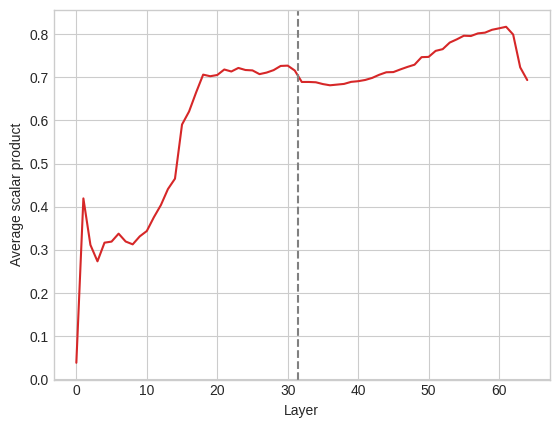

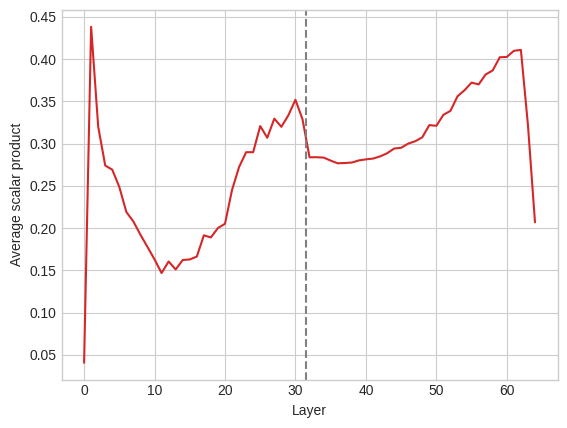

In [9]:
corr_average_random=df_random.groupby('layer').mean()['corr']
corr_average_wiki=df_wiki.groupby('layer').mean()['corr']
L=sns.color_palette("tab10")
color=L[3]
plt.figure()
plt.plot(corr_average_random,color=color)
plt.xlabel("Layer")
plt.ylabel("Average scalar product")
plt.axvline(x=31.5, linestyle='--',color="grey")
plt.savefig("./figures/corr_average_random.eps")
plt.show()
plt.figure()
plt.plot(corr_average_wiki,color=color)
plt.xlabel("Layer")
plt.ylabel("Average scalar product")
plt.axvline(x=31.5, linestyle='--',color="grey")
plt.savefig("./figures/corr_average_random.eps")
plt.show()